<a href="https://colab.research.google.com/github/TharinsaMudalige/Neuron-Brain_Tumor_Detection_Classification_with_XAI/blob/Explainable-AI/Integrating_XAI_to_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Integrating LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=5491b5a742c0166a76e995488d70f05807de0543f69bd2a0fe4629922b2bcf28
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 745ms/step
Predicted Class: Neurocitoma


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

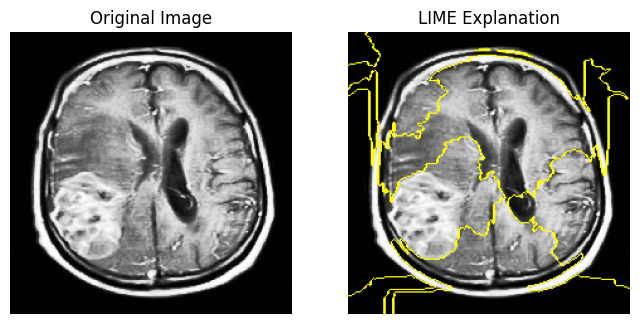

In [ ]:
import numpy as np
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
from lime import lime_image
from skimage.segmentation import mark_boundaries

# Load the trained hybrid model
model_path = '/content/drive/MyDrive/dsgp_models/cnn_model (1).keras'
hybrid_model = tf.keras.models.load_model(model_path)

# Define class labels
class_labels = ["Astrocitoma", "Carcinoma", "Ependimoma", "Ganglioglioma", "Germinoma", "Glioblastoma", "Granuloma", "Meduloblastoma",
                "Neurocitoma", "Oligodendroglioma", "Papiloma", "Schwannoma", "Tuberculoma", "meningioma", "no tumour", "pituitary"]

# Define image preprocessing function
def preprocess_image(img_path):
    """Load and preprocess an image for model prediction."""
    image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, (224, 224))
    image = np.stack([image] * 3, axis=-1)
    image = image.astype(np.float32) / 255.0
    return image

# Load a test image
test_image_path = "/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png"
test_image = preprocess_image(test_image_path)

test_image_exp = np.expand_dims(test_image, axis=0)

# Prediction
predictions = hybrid_model.predict(test_image_exp)
predicted_class = np.argmax(predictions, axis=1)[0]
print(f"Predicted Class: {class_labels[predicted_class]}")

# Create LIME explainer
explainer = lime_image.LimeImageExplainer()

# Define a prediction function for LIME
def predict_fn(images):
    images = np.array(images)  # Convert list to NumPy array
    return hybrid_model.predict(images)  # Get model predictions

# Apply LIME to explain model decision
explanation = explainer.explain_instance(
    test_image, predict_fn, top_labels=1, hide_color=0, num_samples=1000
)

# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(test_image, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()


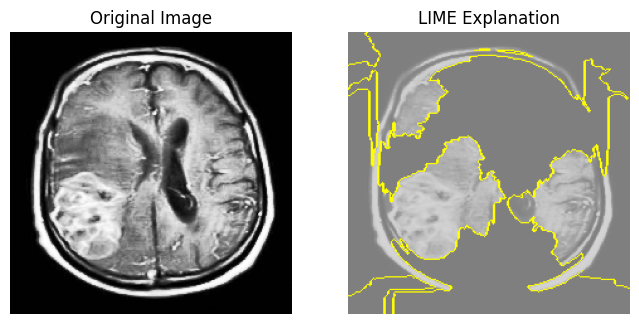

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

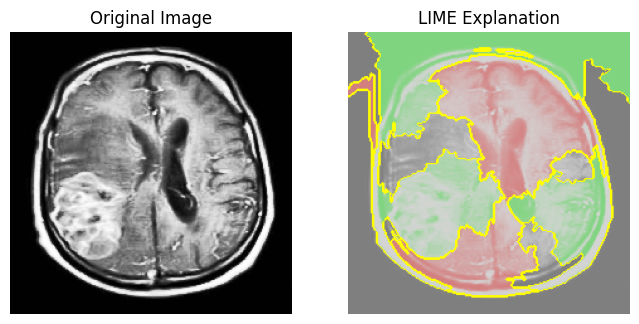

In [ ]:
# Visualize explanation
label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(label, positive_only=False, num_features=20, hide_rest=False)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(mark_boundaries(temp / 3 + 0.5, mask))
plt.title("LIME Explanation")
plt.axis("off")

plt.show()

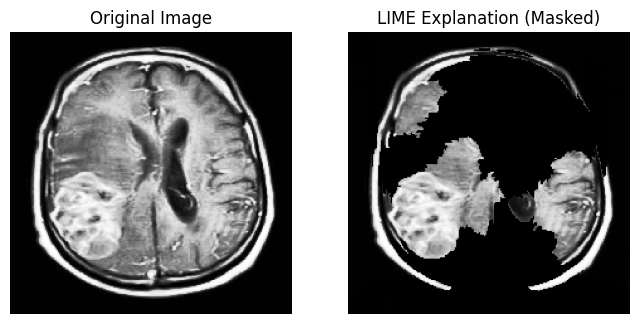

In [ ]:
# Get explanation mask
label = explanation.top_labels[0]
_, mask = explanation.get_image_and_mask(label, positive_only=True, num_features=20, hide_rest=True)

# Apply mask to the original grayscale image
masked_image = test_image[:, :, 0] * mask  # Zero out areas outside the boundary

# Display results
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(test_image[:, :, 0], cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(masked_image, cmap='gray')
plt.title("LIME Explanation (Masked)")
plt.axis("off")

plt.show()

2. Integrating Grad-CAM

In [ ]:
from IPython.display import Image, display
from tensorflow.keras.preprocessing import image as im
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from PIL import Image
import numpy as np

In [ ]:
model_path = '/content/drive/MyDrive/dsgp_models/cnn_model (1).keras'
model = tf.keras.models.load_model(model_path)

In [ ]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.0 MB/s eta 0:00:00


In [ ]:
from tensorflow.keras.preprocessing import image

img_path='/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png'
img = Image.open(img_path).resize((224,224)) #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

In [ ]:
import tensorflow as tf

def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):

    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
# Prepare image
img_size=(224,224)
#img_array = preprocess_input(get_img_array(img_path, size=img_size))
img_path='/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png'
img = Image.open(img_path).resize((224,224)).convert('RGB') #target_size must agree with what the trained model expects!!

# Preprocessing the image
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img.astype('float32')/255

# Remove last layer's softmax
model.layers[-1].activation = None

_ = model.predict(np.zeros((1, 224, 224, 3)))

# Print what the top predicted class is
preds = model.predict(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [ ]:
# Generate class activation heatmap
last_conv_layer_name = "conv2d_5"
heatmap = make_gradcam_heatmap(img, model, last_conv_layer_name)

# Display heatmap
plt.matshow(heatmap)
plt.show()

AttributeError: The layer sequential has never been called and thus has no defined output.

In [ ]:
img_path='/content/drive/MyDrive/Preprocessed_Dataset_classification/Glioblastoma/image_10100.png'
def save_and_display_gradcam(img_path, heatmap, cam_path="/content/drive/MyDrive/New dataset/grad cam image 2.jpg", alpha=0.4):
    # Load the original image
    img = tf.keras.preprocessing.image.load_img(img_path)
    img = tf.keras.preprocessing.image.img_to_array(img)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    display(Image(cam_path))


save_and_display_gradcam(img_path, heatmap)